In [ ]:
!pip install -U gensim
!pip install pyLDAvis
!pip install pattern
!pip install pyspellchecker
!pip install autocorrect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 38.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 43.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.1/88.1 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 77.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 94.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 348.4/348.4 kB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [ ]:
import numpy as np
import pandas as pd
# from transformers import AutoTokenizer, AutoModel
from sklearn.cluster import KMeans
# import tensorflow as tf
import re

#IMPORT DIMENSIONALITY REDUCTION
# from umap import UMAP
# from sklearn.decomposition import PCA

#IMPORT CLUSTERING
# from hdbscan import HDBSCAN
# from sklearn.cluster import KMeans

# from sklearn.feature_extraction.text import CountVectorizer

# from sentence_transformers import SentenceTransformer

# from transformers.pipelines import pipeline
# from flair.embeddings import TranformerDocumentEmbeddings, WordEmbeddings, DocumentPoolEmbeddings, StackedEmbeddings

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [ ]:
from gensim.parsing.preprocessing import remove_stopwords, strip_punctuation , preprocess_string, strip_short, stem_text

In [ ]:
import re
import nltk
nltk.download('stopwords')
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# import textacy
import spacy

In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
with open("final_corpus.txt", "r") as f:
    data = f.readlines()

In [ ]:
# Remove new line characters
data_list = [re.sub('\s+', ' ', d) for d in data]
# Remove Emails
data_list = [re.sub('\S*@\S*\s?', '', d) for d in data_list]

In [ ]:
# df['chats'] = df['chats'].apply(lambda x: re.split('http\/\/.*', str(x))[0])
# df['chats'] = df['chats'].apply(lambda x: re.split('https\/\/.*', str(x))[0])
# df['chats'] = df['chats'].apply(lambda x: re.split('www\/\/.*', str(x))[0])

In [ ]:
df = pd.DataFrame({'chats': data_list})
df['chats'] = df['chats'].astype("string")
df['chats'] = df['chats'].str.replace('[^\w\s]',' ')
df['chats'] = df['chats'].str.replace('_',' ')
df['chats']=df['chats'].str.lower()

<ipython-input-10-e730508128bf>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['chats'] = df['chats'].str.replace('[^\w\s]',' ')


In [ ]:
corpus = df['chats'].tolist()
corpus = list(filter(None,corpus))

In [ ]:
corpus_str = str(corpus)

In [ ]:
from autocorrect import Speller
spell = Speller(lang='en')

In [ ]:
g_words=[]
g_words2=[]
for line in corpus:
    for word in line.split():
        if (word.endswith('g') and (word not in g_words) and (word)):
            g_words.append(word)
            g_words2.append(spell(word))

In [ ]:
def get_tuple(list1, list2):
    merged_list = [(list1[i], list2[i]) for i in range(0, len(list1))]
    return merged_list

In [ ]:
gn_words = []

for word in g_words:
    gn_words.append(word+' ')

In [ ]:
gn_words2 = []

for word in g_words2:
    gn_words2.append(word+' ')

In [ ]:
tuple_pair = get_tuple(gn_words, gn_words2)

In [ ]:
for old, new in tuple_pair:
    corpus_str = corpus_str.replace(old, new)

In [ ]:
gs_words=[]
gs_words2=[]
for line in corpus:
    for word in line.split():
        if (word.endswith('gs') and (word not in gs_words) and (len(word)>4)):
            gs_words.append(word)
            gs_words2.append(spell(word))

In [ ]:
gns_words = []

for word in gs_words:
    gns_words.append(word+' ')

In [ ]:
gns_words2 = []

for word in gs_words2:
    gns_words2.append(word+' ')

In [ ]:
tuple_pair_gs = get_tuple(gns_words, gns_words2)

In [ ]:
tuple_pair_gs

[('setgs ', 'sets '),
 ('meetgs ', 'meets '),
 ('feelgs ', 'feels '),
 ('buildgs ', 'builds '),
 ('teachgs ', 'teaches '),
 ('craigs ', 'craig '),
 ('listgs ', 'lists ')]

In [ ]:
for old, new in tuple_pair_gs:
    corpus_str = corpus_str.replace(old, new)

In [ ]:
ing_ptrn = 'ing'
ing_words = re.findall(ing_ptrn, corpus_str)
ing_words = list(dict.fromkeys(ing_words))

In [ ]:
ing_words=[]
ing_words2=[]
for line in corpus:
    for word in line.split():
        if ('ing' in word) and (word not in ing_words) and (len(word)>10):
            ing_words.append(word)
            word2 = word.replace('ing','in')
            ing_words2.append(spell(word2))
        if ('ing' in word) and (word not in ing_words):
            ing_words.append(word)
            ing_words2.append(spell(word))

In [ ]:
n_ing_words = []

for word in ing_words:
    n_ing_words.append(word+' ')

In [ ]:
n_ing_words2 = []

for word in ing_words2:
    n_ing_words2.append(word+' ')

In [ ]:
tuple_pair_ing = get_tuple(n_ing_words, n_ing_words2)

In [ ]:
# tuple_pair_ing[:30]

In [ ]:
for old, new in tuple_pair_ing:
    corpus_str = corpus_str.replace(old, new)

In [ ]:
corpus_str=corpus_str.replace('cocker','')

In [ ]:
# corpus_str=corpus_str.replace('clot','')
corpus_str=corpus_str.replace('wsong','song')

In [ ]:
corpus_str=corpus_str.replace('teh','')
corpus_str=corpus_str.replace('tho','')
corpus_str=corpus_str.replace('taht','')
corpus_str=corpus_str.replace('rlly','')
corpus_str=corpus_str.replace('gue','')
corpus_str=corpus_str.replace('yea','')
corpus_str=corpus_str.replace('ugh','')

In [ ]:
corpus_str=corpus_str.replace('wut','')
corpus_str=corpus_str.replace('wat','')
corpus_str=corpus_str.replace('wht','')
corpus_str=corpus_str.replace('jus','')
corpus_str=corpus_str.replace('rite','')
corpus_str=corpus_str.replace('dunno','')
corpus_str=corpus_str.replace('wanna','want')

In [ ]:
corpus_x = corpus_str.split(',')

In [ ]:
df=[]
df = pd.DataFrame({'chats': corpus_x})
df['chats'] = df['chats'].astype("string")
df['chats'] = df['chats'].str.replace('[^\w\s]',' ')

<ipython-input-38-629a474efcb9>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['chats'] = df['chats'].str.replace('[^\w\s]',' ')


In [ ]:
# df.groupby(df.index/2).append()
crps = df.chats.tolist()

In [ ]:
grouped_list = [crps[i:i+200] for i in range(0, len(crps), 200)]

In [ ]:
# grouped_list[1]

In [ ]:
# test = [ ' '.join(x) for x in zip(corpus[0::2], corpus[1::2]) ]

In [ ]:
df1=[]
df1 = pd.DataFrame({'chats': grouped_list})
df1['chats'] = df1['chats'].astype("string")
df1['chats'] = df1['chats'].str.replace('[^\w\s]',' ')

<ipython-input-138-33e7f0c8d66b>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['chats'] = df1['chats'].str.replace('[^\w\s]',' ')


In [ ]:
corpus2 = df1.chats.tolist()

In [ ]:
# corpus2 = list(dict.fromkeys(corpus2))
# corpus2 = list(filter(None, corpus2))
# corpus2 = [c.strip(' ') for c in corpus2]
# corpus2 = [c.lower() for c in corpus2]

In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True, min_len=1, max_len=50))  # deacc=True removes punctuations

data_words = list(sent_to_words(grouped_list))

In [ ]:
from gensim.parsing.preprocessing import remove_stopwords, strip_punctuation , preprocess_string, strip_short, stem_text

def preprocess(text):
    
    # clean text based on given filters
    CUSTOM_FILTERS = [lambda x: x.lower(), 
                                remove_stopwords, 
                                strip_punctuation, 
                                strip_short
                                # stem_text
                      ]
    text = preprocess_string(text, CUSTOM_FILTERS)
    
    return text

# apply function to all reviews 
df['Text (Clean)'] = df['chats'].apply(lambda x: preprocess(x))

In [ ]:
bigram = gensim.models.Phrases(data_words, min_count=15, threshold=150) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [ ]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[doc] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        t= [token.lemma_ for token in doc if token.pos_ in allowed_postags]
        texts_out.append(t)
    return texts_out

In [ ]:
# cj = [['As he crossed toward the pharmacy at the corner he involuntarily turned his head because of a burst of light that had ricocheted from his temple'],[' and saw, with that quick smile with which we greet a rainbow or a rose'],[' a blindingly white parallelogram of sky being unloaded from the van—a dresser'],[' with mirrors across which, as across a cinema screen, passed a flawlessly'],[' clear reflection of boughs sliding and swaying not arboreally, but with a human vacillation, produced by the nature of those'],[ 'who were carrying this sky, these boughs, this gliding façade.']]
# test = lemmatization(cj, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
# # test

In [ ]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Form Trigrams
data_words_trigrams = make_trigrams(data_words_nostops)

In [ ]:
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

KeyboardInterrupt: ignored

In [ ]:
data_lemmatized = df1['Text (Clean)']

In [ ]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)
id2word.filter_extremes(no_below=25)

# dictionary = corpora.Dictionary(df['Text (Clean)'])
# dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=20000) 

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [ ]:
tfidf = TfidfModel(dictionary=dictionary)

corpus = [
    dictionary.doc2bow(d)
    for d
    in df['Text (Clean)']
]

corpus_tfidf = list(tfidf[corpus])

In [ ]:
nmf = GensimNmf(
        corpus=corpus,
        num_topics=30,
        id2word=dictionary,
        chunksize=1000,
        passes=10,
        kappa=.1,
        minimum_probability=0.1,
        w_max_iter=500,
        w_stop_condition=0.0001,
        h_max_iter=100,
        h_stop_condition=0.001,
        eval_every=5,
        normalize=True,
        random_state=42
)

In [ ]:
nmf.show_topics()

[(22,
  '0.099*"ask" + 0.071*"eat" + 0.067*"nite" + 0.063*"pick" + 0.052*"watch" + 0.042*"send" + 0.041*"movie" + 0.013*"pussy" + 0.012*"phone" + 0.011*"question"'),
 (15,
  '0.113*"kinda" + 0.073*"cool" + 0.065*"room" + 0.035*"leave" + 0.025*"soon" + 0.024*"weekend" + 0.020*"stay" + 0.018*"place" + 0.017*"fun" + 0.016*"chat"'),
 (11,
  '0.132*"baby" + 0.062*"new" + 0.055*"hard" + 0.048*"right" + 0.047*"bad" + 0.040*"kiss" + 0.040*"dad" + 0.029*"wish" + 0.016*"house" + 0.015*"car"'),
 (1,
  '0.203*"lot" + 0.083*"right" + 0.079*"way" + 0.060*"use" + 0.025*"bed" + 0.017*"kiss" + 0.012*"watch" + 0.011*"people" + 0.009*"big" + 0.009*"hurt"'),
 (21,
  '0.274*"try" + 0.072*"need" + 0.055*"maybe" + 0.036*"wait" + 0.035*"play" + 0.025*"dog" + 0.018*"stay" + 0.009*"man" + 0.008*"figure" + 0.008*"later"'),
 (10,
  '0.353*"guy" + 0.095*"girl" + 0.093*"old" + 0.034*"year" + 0.023*"big" + 0.020*"age" + 0.013*"sweet" + 0.011*"young" + 0.010*"nice" + 0.010*"sound"'),
 (13,
  '0.660*"want" + 0.013*"fu

In [ ]:
CoherenceModel(
    model=nmf,
    texts=df['Text (Clean)'],
    corpus=corpus_tfidf,
    coherence='c_v'
).get_coherence()

0.29079337353406315

In [ ]:
from operator import itemgetter

# Use Gensim's NMF to get the best num of topics via coherence score
texts = df['Text (Clean)']

# Create a dictionary
# In gensim a dictionary is a mapping between words and their integer id
dictionary = Dictionary(texts)

# Filter out extremes to limit the number of features
dictionary.filter_extremes(
    no_below=3,
    no_above=0.85,
    keep_n=5000
)

# Create the bag-of-words format (list of (token_id, token_count))
corpus = [dictionary.doc2bow(text) for text in texts]

# Create a list of the topic numbers we want to try
topic_nums = list(np.arange(5, 100 + 1, 5))

# Run the nmf model and calculate the coherence score
# for each number of topics
coherence_scores = []

for num in topic_nums:
    nmf_model = GensimNmf(
        corpus=corpus,
        num_topics=num,
        id2word=dictionary,
        chunksize=2000,
        passes=10,
        kappa=.1,
        minimum_probability=0.1,
        w_max_iter=500,
        w_stop_condition=0.0001,
        h_max_iter=100,
        h_stop_condition=0.001,
        eval_every=10,
        normalize=True,
        random_state=42
    )
    
    # Run the coherence model to get the score
    cm = CoherenceModel(
        model=nmf_model,
        texts=texts,
        dictionary=dictionary,
        coherence='c_v'
    )
    
    coherence_scores.append(round(cm.get_coherence(), 5))


# Get the number of topics with the highest coherence score
scores = list(zip(topic_nums, coherence_scores))
best_num_topics = sorted(scores, key=itemgetter(1), reverse=True)[0][0]

print(best_num_topics)

95


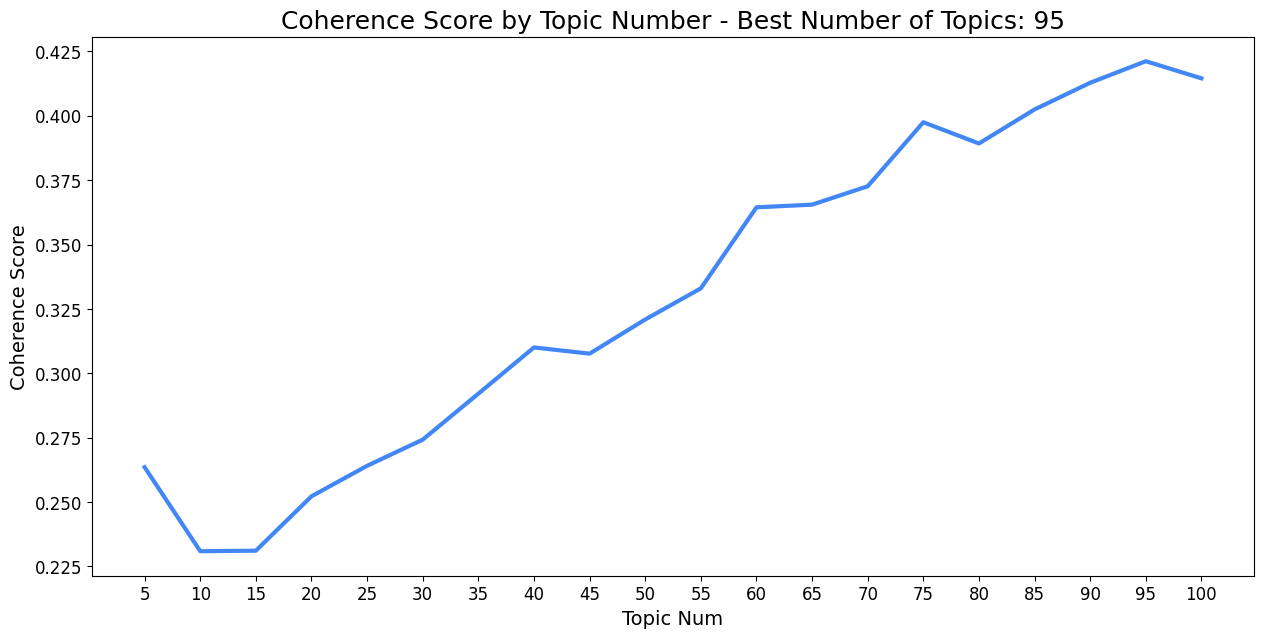

In [ ]:
import matplotlib.pyplot as plt

# Plot the results
fig = plt.figure(figsize=(15, 7))

plt.plot(
    topic_nums,
    coherence_scores,
    linewidth=3,
    color='#4287f5'
)

plt.xlabel("Topic Num", fontsize=14)
plt.ylabel("Coherence Score", fontsize=14)
plt.title('Coherence Score by Topic Number - Best Number of Topics: {}'.format(best_num_topics), fontsize=18)
plt.xticks(np.arange(5, max(topic_nums) + 1, 5), fontsize=12)
plt.yticks(fontsize=12)

file_name = 'c_score'

# fig.savefig(
#     file_path + file_name + '.png',
#     dpi=fig.dpi,
#     bbox_inches='tight'
# )

plt.show()